# Define vector 3D class

In [1]:
import math

class Vector3D:
    def __init__(self, initial_x = 0.0, initial_y = 0.0, initial_z = 0.0):
        self.x = initial_x
        self.y = initial_y
        self.z = initial_z
    
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    # Operator overloading for adding two vecs  
    def __add__(self, v): 
        return Vector3D(self.x + v.x, self.y + v.y, self.z + v.z)
    
    def __mul__(self, scalar):
        return Vector3D(self.x*scalar, self.y*scalar, self.z*scalar)
    
    #printing overloaded
    def __str__(self): 
        return "x=" + str(self.x) + ", y=" + str(self.y) + ", z=" + str(self.z)


# Define Particle class

In [2]:
import math

class Particle:
    
    def __init__(self, initial_m = 1.0, diameter = 2.0, initial_position = Vector3D(0.0, 0.0, 0.0), initial_velocity = Vector3D(0.0, 0.0, 0.0)):
        self.m = initial_m
        self.d = diameter
        self.position = initial_position
        self.velocity = initial_velocity
        
    def volume(self):
        self.volume = (4.0/3.0) * math.pi * ((self.d/2.0)**3)
    
    def update_position(self, dt):
         self.position = self.position + (self.velocity * dt)
            
    def get_force_on_block(self, k):
        self.force = self.position * -1.0 * k

    def update_velocity(self, dt):
         self.velocity = self.velocity + (self.force * (dt / self.m))        

    def kinetic_energy(self):
         self.ke = 0.5 * self.m * (self.velocity.magnitude()**2)
            
    def get_energy_on_block(self, k):
        self.pe = 0.5 * k * (self.position.x **2)

# Velocity verlet code

In [3]:
import math
import time

def velocity_verlet(mass=None, k=None,time=100, deltaT=0.01):
    
    print("Modeling the block-spring system")
    print("Need a useful abstraction of the problem: a point particle")
    print("Make a Particle class")
    print("Set up initial conditions")

    
    sphere = Particle(initial_m = 1.0, diameter = 2.0, initial_position = Vector3D(0.0, 0.0, 0.0), initial_velocity = Vector3D(0.0, 0.0, 0.0))
    sphere_volume = sphere.volume()
    print("volume of a unit (radius = 1) sphere is {}".format(sphere_volume))
    
    # inputs
    if mass is None:
        print("enter mass of the block: ")
        time.sleep(0.1) # This sleep is not needed, just added to get input box below the print statements
        mass = float(input())
    if k is None:
        print("enter spring constant: ")
        time.sleep(0.1) # This sleep is not needed, just added to get input box below the print statements
        k = float(input())
    
    block = Particle(initial_m = mass, diameter = 2.0, initial_position = Vector3D(-10.0, 0.0, 0.0), initial_velocity = Vector3D(0.0, 0.0, 0.0));
    
    # we can compute the initial force on the block
    block.get_force_on_block(k)

    #Print the system
    print("mass of the block is {}".format(block.m))
    print("initial position of the block is {}".format(block.position.x))
    print("initial velocity of the block is {}".format(block.velocity.x))
    print("initial force on the block is {}".format(block.force.x))
     
    #we are interested in simulating the dynamics of this block against the spring force 
    #exact solution is available
    #x(t) = - cos(sqrt(k/m)*t)
    #discretize the exact solution and file it

    #t = 10 #time
    #N = 1000 #number of data points for which exact solution is discretized
    
    #exact_solution = open("exact_dynamics.out", "w")
    
    #for i in range(N):
    #    exact_solution.write("{0:.3f}  {1:.3f}\n".format(i*t/N, -math.cos(i*t/N)))

    #exact_solution.close()  
    #use the computer to simulate the dynamics of the particle
    #need integrators that evolve the trajectory using the equation of motion
    #one timestep dt at a time

    #simulation Begins here
    #S = 1000
    #dt = t/S
    
    t = time
    dt=deltaT
    S = int(t // dt)
    dump_freq=1
    
    #simulated_result = open("simulated_dynamics.out", "w")
    simulated_result = open("data/dynamics_mass={}_k={:.1f}_t={}_deltaT={}.out".format(mass,k,t, dt), "w")
    
    block.get_energy_on_block(k)
    block.kinetic_energy()
    simulated_result.write("{}  {}  {}  {}  {}  {} \n".format(0*dt, block.position.x, block.velocity.x, block.ke, block.pe, (block.ke + block.pe)))
    
    
    for i in range(S):
        block.update_velocity(dt/2.0) #update velocity half timestep
        block.update_position(dt) #update position full timestep
        block.get_force_on_block(k)
        block.update_velocity(dt/2.0)
        #filing the time, position of the block
        block.kinetic_energy()
        block.get_energy_on_block(k)
        #if i%dump_freq==0 or i==0:
        simulated_result.write("{}  {}  {}  {}  {}  {} \n".format((i+1)*dt, block.position.x, block.velocity.x, block.ke, block.pe, (block.ke + block.pe)))
    
    simulated_result.close()
    print("Simulation is over.")

# Run the code

In [8]:
# Run the program
#mass=1.0, k=1.0
# mass=10.0, k=1.0, time=100, deltaT=0.01
params__ = (10.0, 1.0, 100, 0.001)
velocity_verlet(*params__)
#velocity_verlet()

Modeling the block-spring system
Need a useful abstraction of the problem: a point particle
Make a Particle class
Set up initial conditions
volume of a unit (radius = 1) sphere is None
mass of the block is 10.0
initial position of the block is -10.0
initial velocity of the block is 0.0
initial force on the block is 10.0
Simulation is over.


# Plot the graphs

In [9]:
import numpy as np
## Reduce 0.001 to 0.01 sampling
delta_base = 0.001
time__ = 100
params__ = (10.0, 1.0, time__, delta_base)
correct_ = np.loadtxt("data/dynamics_mass={}_k={}_t={}_deltaT={}.out".format(*params__))
factor_ = 10
np.savetxt("data/dynamics_mass={}_k={}_t={}_deltaT={}.out".format(*params__), correct_[::factor_,:], delimiter='\t')

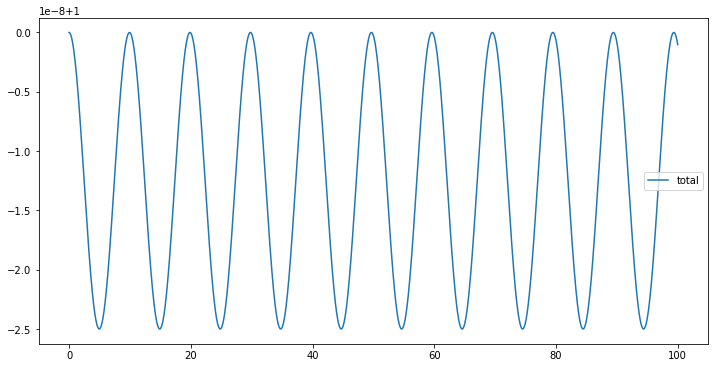

In [10]:
# Visualize the data
'''
GNUPlot
plot 'exact_dynamics.out' with lines, 'simulated_dynamics.out' using 1:2 with lp pt 6 title "position", 'simulated_dynamics.out' using 1:3 with p pt 4 title "velocity", 'simulated_dynamics.out' u 1:4 w p title "kinetic", 'simulated_dynamics.out' u 1:5 w p title "potential", "simulated_dynamics.out" u 1:6 w p title "total"

'''

import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline


import numpy as np

simulated_result_file = np.loadtxt("data/dynamics_mass={}_k={}_t={}_deltaT={}.out".format(*params__))

fig=plt.figure(figsize=(12, 6))
#plt.plot(simulated_result_file[:,0],simulated_result_file[:,1], label='position')
#plt.plot(simulated_result_file[:,0],simulated_result_file[:,2], label='velocity')
#plt.plot(simulated_result_file[:,0],simulated_result_file[:,3], label='kinetic')
#plt.plot(simulated_result_file[:,0],simulated_result_file[:,4], label='potential')
plt.plot(simulated_result_file[:,0],simulated_result_file[:,5]/simulated_result_file[0,5], label='total')
plt.legend()

